## **Mobile Telecom Customer Churn Analysis**

**Life Cycle of Project**

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Data Cleaning
- Exploratory Data Analysis
- Choose Best Model

### **1) Problem statement**
Identify the target customers most likely to churn and understand the factors contributing to their decision.

### **2) Data Collection**
- Sample Dataset contains Telecom Customer Data and shows customers churn status
- Dataset Source - C:/Users/Ansela/Downloads/customer_churn.csv
- The data consists of 21 column and 7043 rows.


### **Import Data and Required Packages**

**Importing Pandas, Numpy, Matplotlib and Seaborn**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv('C:/Users/Ansela/Downloads/customer_churn.csv')

**Show Top 10 Records**

In [3]:
df.head(10)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### **3) Data Checks to perform**

- Check shape of dataset
- Check columns of dataset
- Check data type
- Check statistics of numerical variables
- Check the number of target variables per category
- Check missing values

**Shape of the dataset**

In [4]:
df.shape

(7043, 21)

**Columns of the dataset**

In [5]:
df.columns.values

array(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**Check data types**

In [6]:
df.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 **Check statistics of numerical variables**

In [7]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Insights**
- SeniorCitizen is actually a categorical variable hence the 25%-50%-75% distribution is not accurate

- 75% customers have tenure less than 55 months

- Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

**Number of target variables per category**

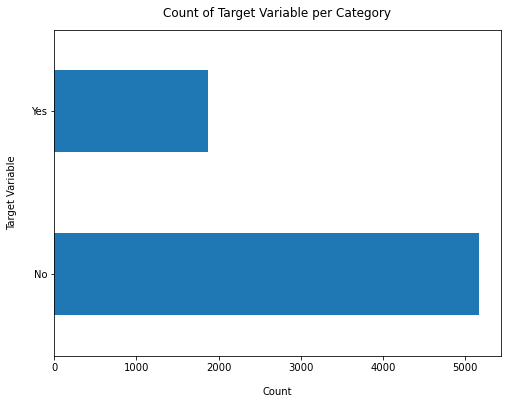

In [8]:
# Plot the horizontal bar chart
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))

# Add labels and title
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Target Variable per Category", y=1.02);

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
df['Churn'].value_counts()/len(df['Churn']) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

**Insights**
- Data is highly imbalanced, ratio = 73:27


**Check missing values**

In [11]:
df.isna().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


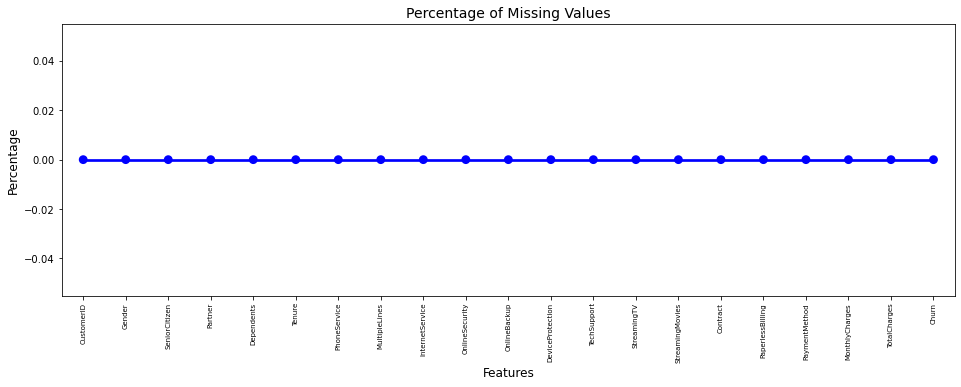

In [13]:
# Calculate percentage of missing values
missing = pd.DataFrame((df.isnull().sum() * 100 / df.shape[0]), columns=['Percentage']).reset_index()

# Plot: Point plot for missing values percentage
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y='Percentage', data=missing, color='blue')
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values", fontsize=14)
plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.show()

**Missing Data - Initial Intuition**

Here, we don't have any missing data.

### 4) **Data Cleaning**

1. Create a copy of base data for manupulation & processing

In [14]:
telco_data = df.copy()

2. TotalCharges should be numeric amount. Let's convert it to numerical data type.

In [15]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As we can see there are 11 missing values in TotalCharges column. Let's check these records.

In [16]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [17]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)

#telco_data.fillna(0)

5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group of 1-12, for tenure between 1 to 2 Yrs: tenure group of 13-24, so on...

In [18]:
# Get the max tenure
print(telco_data['Tenure'].max()) #72 months

72


In [19]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['TenureGroup'] = pd.cut(telco_data.Tenure, range(1, 80, 12), right=False, labels=labels)

In [20]:
telco_data['TenureGroup'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: TenureGroup, dtype: int64

6. Remove columns not required for processing

In [21]:
#drop column customerID and tenure
telco_data.drop(columns= ['CustomerID','Tenure'], axis=1, inplace=True)
telco_data.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### **5) Exploratory Data Analysis**

1. Plot distibution of individual predictors by churn

**Univariate Analysis**

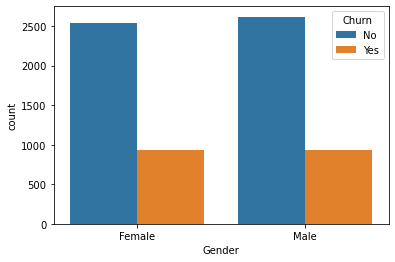

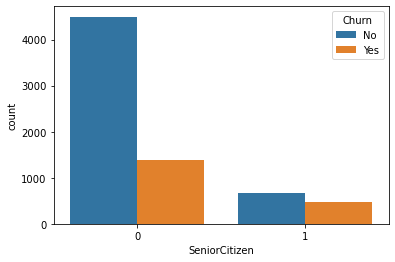

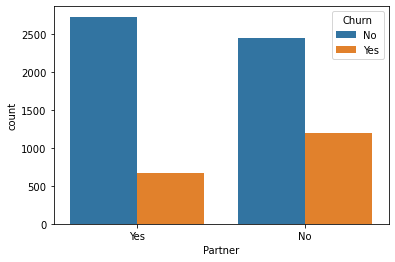

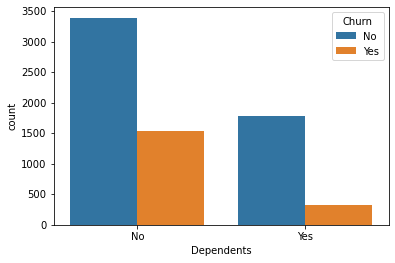

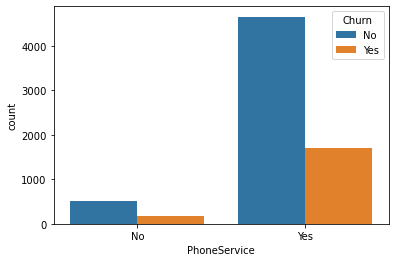

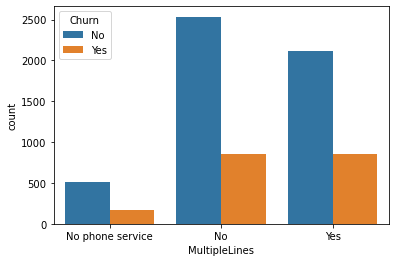

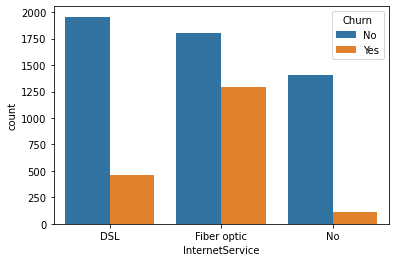

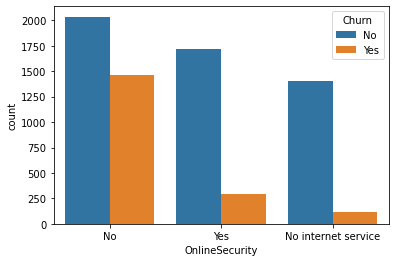

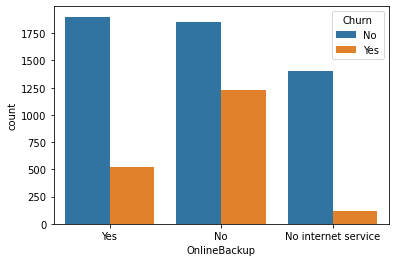

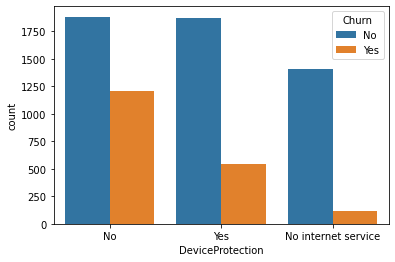

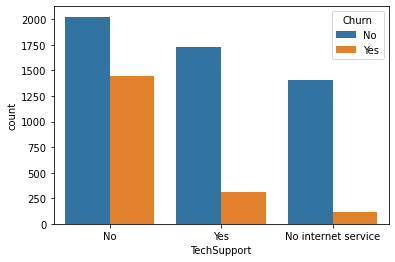

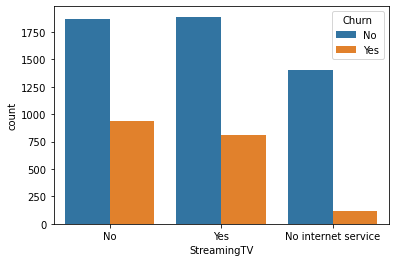

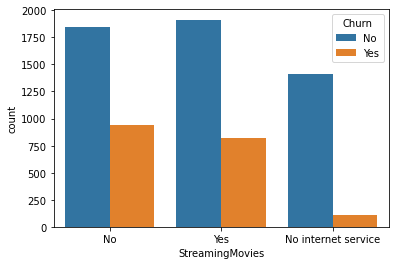

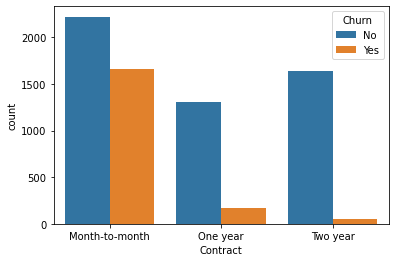

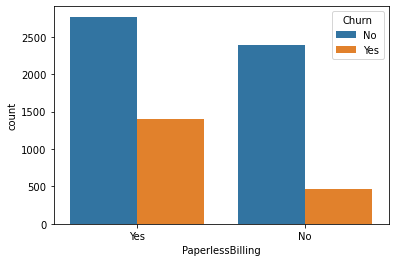

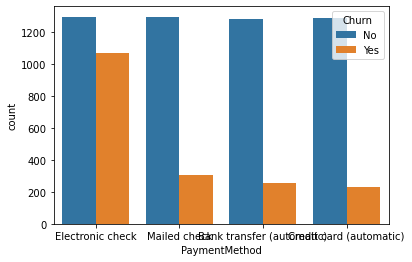

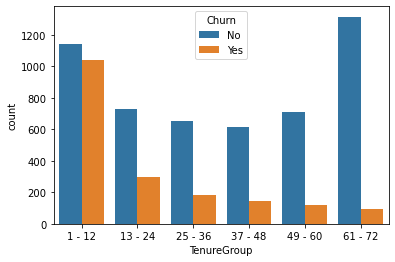

In [22]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [23]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [24]:
telco_data.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


3. Convert all the categorical variables into dummy variables

In [25]:
# Explore the categories in variable
print("Categories in 'Gender' variable: ",end=" ")
print(telco_data['Gender'].unique())

print("Categories in'SeniorCitizen' variable: ",end=" " )
print(telco_data['SeniorCitizen'].unique())

print("Categories in 'Partner' variable: ",end=" " )
print(telco_data['Partner'].unique())

print("Categories in 'Dependents' variable: ",end=" " )
print(telco_data['Dependents'].unique())

print("Categories in 'PhoneService' variable: ",end=" ")
print(telco_data['PhoneService'].unique())

print("Categories in'MultipleLines' variable: ",end=" " )
print(telco_data['MultipleLines'].unique())

print("Categories in 'InternetService' variable: ",end=" " )
print(telco_data['InternetService'].unique())

print("Categories in 'OnlineSecurity' variable: ",end=" " )
print(telco_data['OnlineSecurity'].unique())

print("Categories in 'OnlineBackup' variable: ",end=" ")
print(telco_data['OnlineBackup'].unique())

print("Categories in'DeviceProtection' variable: ",end=" " )
print(telco_data['DeviceProtection'].unique())

print("Categories in 'TechSupport' variable: ",end=" " )
print(telco_data['TechSupport'].unique())

print("Categories in 'StreamingTV' variable: ",end=" " )
print(telco_data['StreamingTV'].unique())

print("Categories in 'StreamingMovies' variable: ",end=" " )
print(telco_data['StreamingMovies'].unique())

print("Categories in 'Contract' variable: ",end=" ")
print(telco_data['Contract'].unique())

print("Categories in'PaperlessBilling' variable: ",end=" " )
print(telco_data['PaperlessBilling'].unique())

print("Categories in 'PaymentMethod' variable: ",end=" " )
print(telco_data['PaymentMethod'].unique())

print("Categories in 'MonthlyCharges' variable: ",end=" " )
print(telco_data['MonthlyCharges'].unique())

print("Categories in 'TotalCharges' variable: ",end=" " )
print(telco_data['TotalCharges'].unique())

print("Categories in 'Churn' variable: ",end=" " )
print(telco_data['Churn'].unique())

print("Categories in 'TenureGroup' variable: ",end=" " )
print(telco_data['TenureGroup'].unique())


Categories in 'Gender' variable:  ['Female' 'Male']
Categories in'SeniorCitizen' variable:  [0 1]
Categories in 'Partner' variable:  ['Yes' 'No']
Categories in 'Dependents' variable:  ['No' 'Yes']
Categories in 'PhoneService' variable:  ['No' 'Yes']
Categories in'MultipleLines' variable:  ['No phone service' 'No' 'Yes']
Categories in 'InternetService' variable:  ['DSL' 'Fiber optic' 'No']
Categories in 'OnlineSecurity' variable:  ['No' 'Yes' 'No internet service']
Categories in 'OnlineBackup' variable:  ['Yes' 'No' 'No internet service']
Categories in'DeviceProtection' variable:  ['No' 'Yes' 'No internet service']
Categories in 'TechSupport' variable:  ['No' 'Yes' 'No internet service']
Categories in 'StreamingTV' variable:  ['No' 'Yes' 'No internet service']
Categories in 'StreamingMovies' variable:  ['No' 'Yes' 'No internet service']
Categories in 'Contract' variable:  ['Month-to-month' 'One year' 'Two year']
Categories in'PaperlessBilling' variable:  ['Yes' 'No']
Categories in 'Paym

In [26]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1 - 12,TenureGroup_13 - 24,TenureGroup_25 - 36,TenureGroup_37 - 48,TenureGroup_49 - 60,TenureGroup_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


9. Relationship between MonthlyCharges and TotalCharges

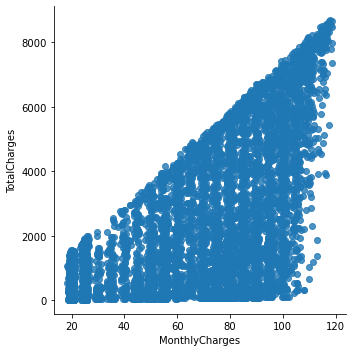

In [27]:
# Generate a scatter plot using seaborn's lmplot function
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

**Insights**

TotalCharges increase as MonthlyCharges increase - as expected.

10. Churn by MonthlyCharges and TotalCharges

Text(0.5, 1.0, 'Monthly charges by churn')

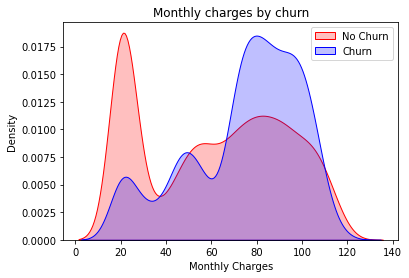

In [28]:
# Plot the KDE (Kernel Density Estimation) for MonthlyCharges where Churn is 0 (No Churn)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)

# Add the KDE for MonthlyCharges where Churn is 1 (Churn) on the same plot
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)

# Add a legend to differentiate between "No Churn" and "Churn" distributions
Mth.legend(["No Churn","Churn"],loc='upper right')

# Set labels and title for the plot
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight**

Churn is high when MonthlyCharges are high

Text(0.5, 1.0, 'Total charges by churn')

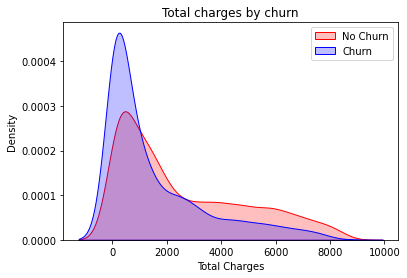

In [29]:
# Plot the KDE (Kernel Density Estimation) for TotalCharges where Churn is 0 (No Churn)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)

# Add the KDE for MonthlyCharges where Churn is 1 (Churn) on the same plot
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)

# Add a legend to differentiate between "No Churn" and "Churn" distributions
Tot.legend(["No Churn","Churn"],loc='upper right')

# Set labels and title for the plot
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')


**Surprising insight**

Higher Churn at lower TotalCharges

However if we combine the insights of 3 parameters i.e. Tenure, MonthlyCharges & TotalCharges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher MonthlyCharge**, **Lower tenure** and **Lower TotalCharge** are linked to High Churn.

11. Build a corelation of all predictors wrt 'Churn'

<AxesSubplot:>

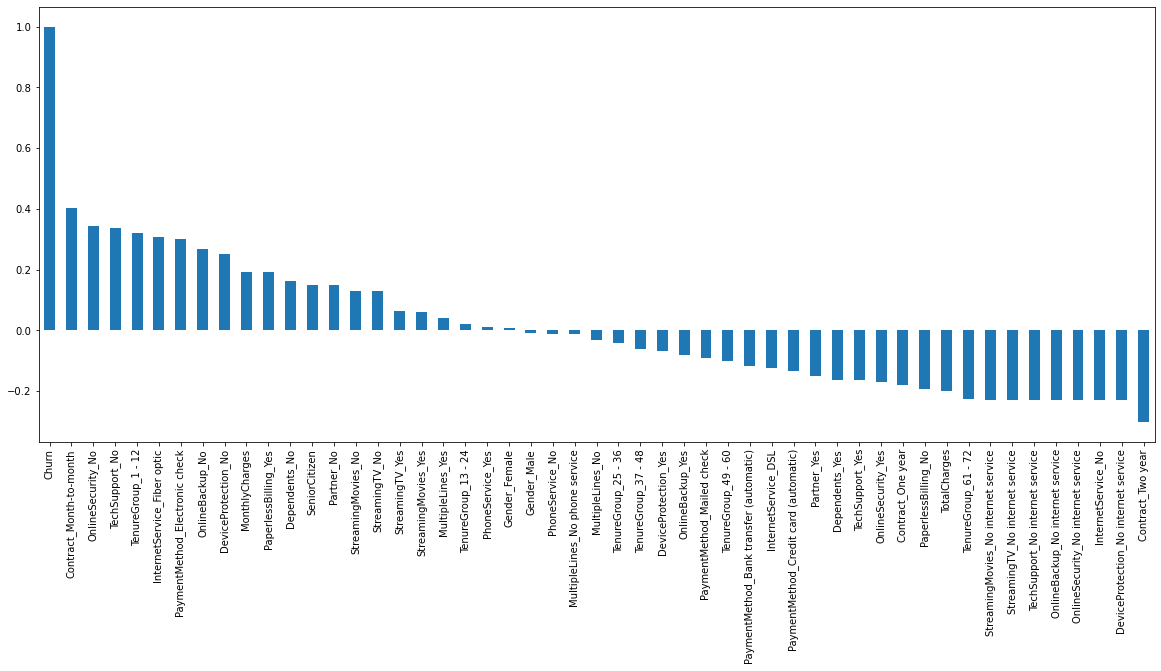

In [30]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


**Insight**

- **HIGH Churn** seen in case of **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**.

- **LOW Churn** is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**.

- Factors like **Gender, Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn.

**Bivariate Analysis**

In [31]:
# Create a new DataFrame that contains only the rows where 'Churn' is 0 (No Churn)
new_df1_target0 = telco_data.loc[telco_data["Churn"]==0]

# Create a new DataFrame that contains only the rows where 'Churn' is 1 (Churn)
new_df1_target1 = telco_data.loc[telco_data["Churn"]==1]

In [32]:
def uniplot(df,col,title,hue =None):
    # Set the seaborn style to 'whitegrid' for a clean background with grid lines
    sns.set_style('whitegrid')
    
    # Set the seaborn context to 'talk' for larger font sizes suitable for presentations
    sns.set_context('talk')
    
    # Customize matplotlib parameters for label and title size
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    # Create a temporary Series from the hue to handle its unique values
    temp = pd.Series(data = hue)
    
    # Create a figure and axes for the plot
    fig, ax = plt.subplots()
    
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
    
    # Display the plot
    plt.show()

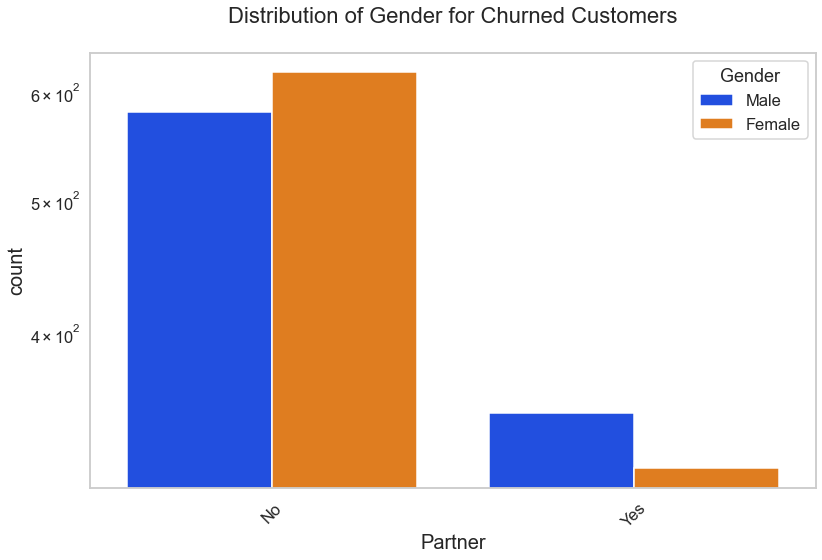

In [33]:
# Call the 'uniplot' function to plot the distribution of the 'Partner' column
# for customers who have churned (new_df1_target1), with hue based on 'gender'.
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='Gender')

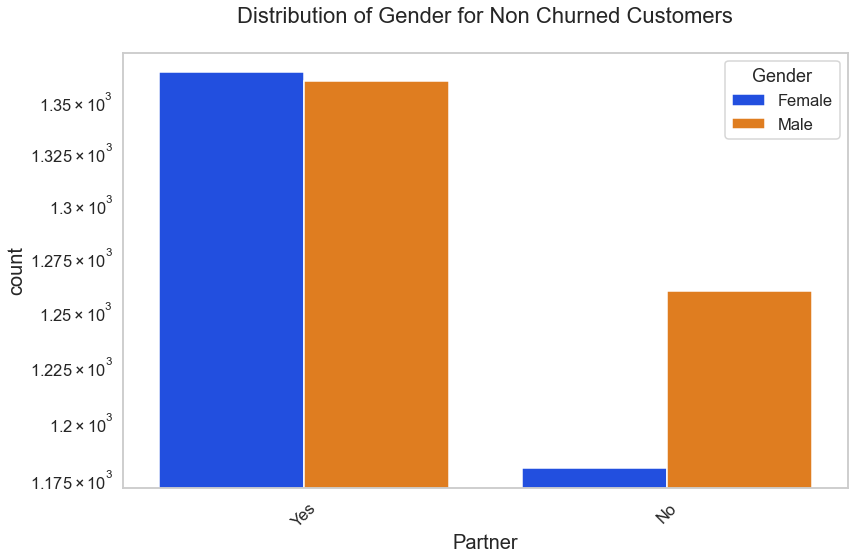

In [34]:
# Call the 'uniplot' function to plot the distribution of the 'Partner' column
# for customers who have not churned (new_df1_target0), with hue based on 'gender'.
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='Gender')

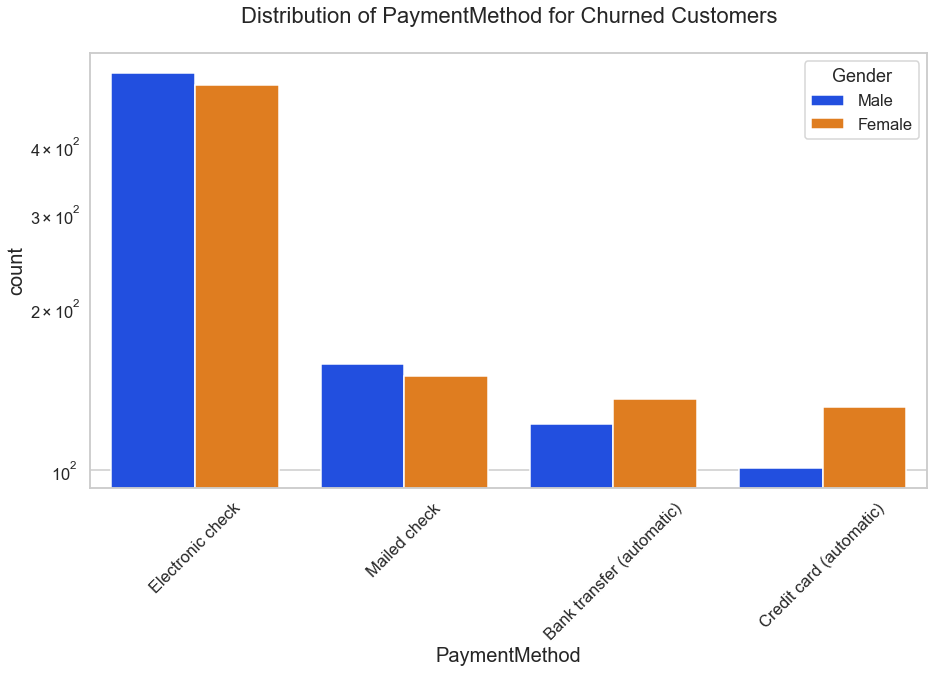

In [35]:
# Call the 'uniplot' function to plot the distribution of the 'PaymentMethod' column
# for customers who have churned (new_df1_target1), with hue based on 'gender'.
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='Gender')

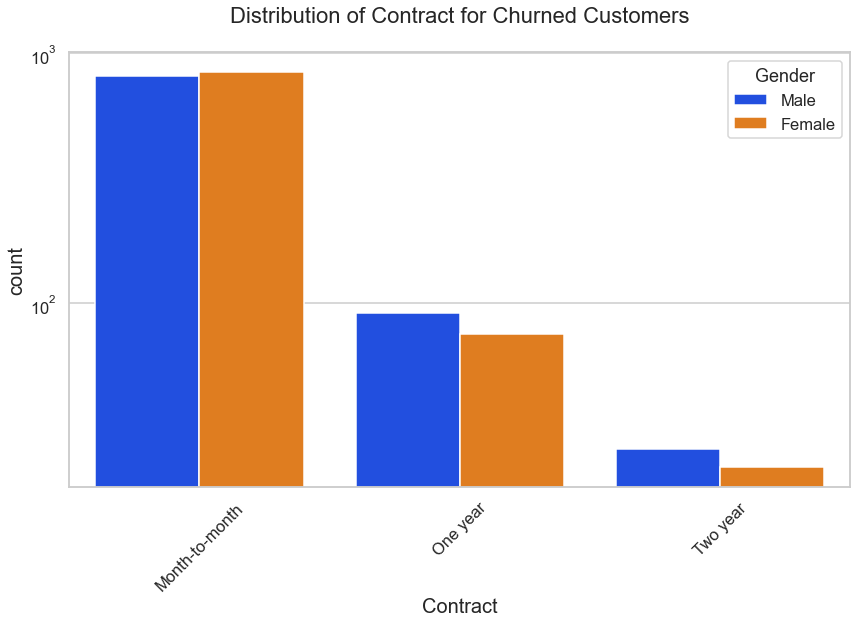

In [36]:
# Call the 'uniplot' function to plot the distribution of the 'Contract' column
# for customers who have churned (new_df1_target1), with hue based on 'gender'.
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='Gender')

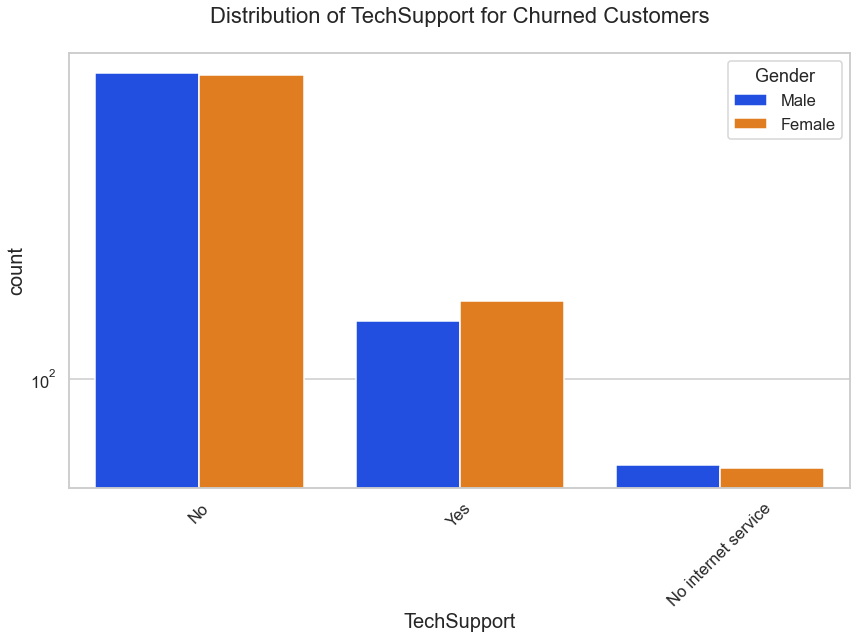

In [37]:
# Call the 'uniplot' function to plot the distribution of the 'TechSupport' column
# for customers who have churned (new_df1_target1), with hue based on 'gender'.
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='Gender')

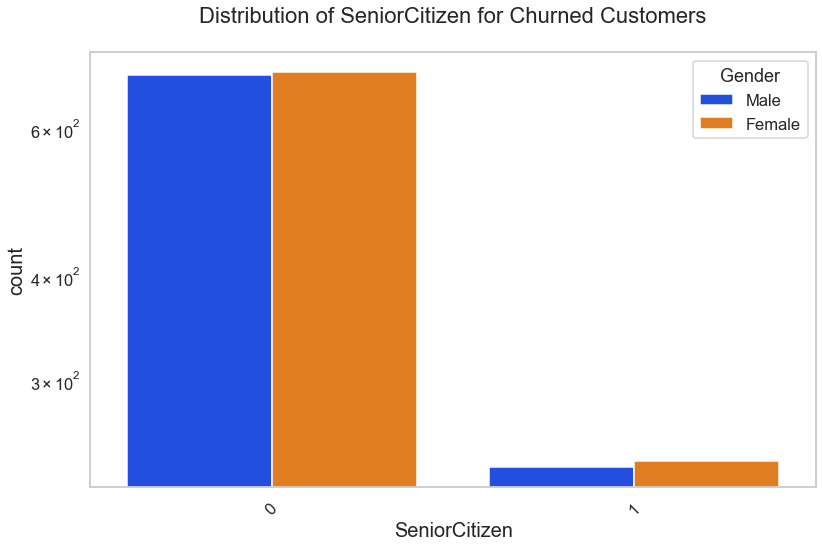

In [38]:
# Call the 'uniplot' function to plot the distribution of the 'SeniorCitizen' column
# for customers who have churned (new_df1_target1), with hue based on 'gender'.
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='Gender')

**Insights**

- Electronic check medium are the highest churners
- Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
- No Online security, No Tech Support category are high churners
- Non senior Citizens are high churners

### **6) Model Building**

**Import Data and Required Packages**

In [39]:
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1 - 12,TenureGroup_13 - 24,TenureGroup_25 - 36,TenureGroup_37 - 48,TenureGroup_49 - 60,TenureGroup_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [58]:
# Importing Libraries
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings('ignore')

**Preparing X and Y variables**

In [45]:
X = telco_data_dummies.drop('Churn',axis=1)

X.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1 - 12,TenureGroup_13 - 24,TenureGroup_25 - 36,TenureGroup_37 - 48,TenureGroup_49 - 60,TenureGroup_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [47]:
Y = telco_data_dummies['Churn']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

**Train Test Split**

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

**Decision Tree Classifier**

In [50]:
model_dt = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [51]:
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [52]:
Y_pred=model_dt.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
model_dt.score(X_test,Y_test)

0.7860696517412935

In [54]:
print(classification_report(Y_test, Y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1057
           1       0.59      0.46      0.52       350

    accuracy                           0.79      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.77      0.79      0.78      1407



As we can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling)

In [60]:
sm = SMOTEENN()
X_resampled, Y_resampled = sm.fit_resample(X,Y)

In [61]:
Xr_train, Xr_test, Yr_train, Yr_test = train_test_split(X_resampled, Y_resampled, test_size=0.2)

In [65]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [67]:
model_dt_smote.fit(Xr_train, Yr_train)
Yr_predict = model_dt_smote.predict(Xr_test)
model_score_r = model_dt_smote.score(Xr_test, Yr_test)
print("Model Score: ", model_score_r)
print("Classification Report:\n", metrics.classification_report(Yr_test, Yr_predict))

Model Score:  0.9290598290598291
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       515
           1       0.93      0.95      0.94       655

    accuracy                           0.93      1170
   macro avg       0.93      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170



In [69]:
print(metrics.confusion_matrix(Yr_test, Yr_predict))

[[467  48]
 [ 35 620]]


We can calculate the accuracy using the formula:

Accuracy = (TP+TN)/(TP+TN+FP+FN)

So, the accuracy of the model in this case is approximately 92.8%.

**Random Forest Classifier**

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [72]:
model_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [73]:
Y_pred = model_rf.predict(X_test)

In [74]:
model_rf.score(X_test, Y_test)

0.8116560056858564

In [75]:
print(classification_report(Y_test, Y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1057
           1       0.67      0.47      0.56       350

    accuracy                           0.81      1407
   macro avg       0.76      0.70      0.72      1407
weighted avg       0.80      0.81      0.80      1407



In [77]:
sm = SMOTEENN()
X_resampled1, Y_resampled1 = sm.fit_resample(X,Y)

In [78]:
Xr_train1, Xr_test1, Yr_train1, Yr_test1 = train_test_split(X_resampled1, Y_resampled1, test_size=0.2)

In [79]:
model_rf_smote = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [80]:
model_rf_smote.fit(Xr_train1, Yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [81]:
Yr_predict1 = model_rf_smote.predict(Xr_test1)

In [82]:
model_score_r1 = model_rf_smote.score(Xr_test1, Yr_test1)

In [84]:
print("Model Score: ", model_score_r1)
print("Classification Report:\n", metrics.classification_report(Yr_test1, Yr_predict1))

Model Score:  0.9436860068259386
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       530
           1       0.93      0.97      0.95       642

    accuracy                           0.94      1172
   macro avg       0.95      0.94      0.94      1172
weighted avg       0.94      0.94      0.94      1172



In [85]:
print(metrics.confusion_matrix(Yr_test1, Yr_predict1))

[[486  44]
 [ 22 620]]



We can calculate the accuracy using the formula:

Accuracy = (TP+TN)/(TP+TN+FP+FN)

So, the accuracy of the model in this case is approximately 94.5%.

**Using RF Classifier, we are able to get better results than Decision Tree.**